In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import r2_score
unclean_data=pd.read_csv('complete_dataset_uncleaned_new.csv')
data3=unclean_data.iloc[:,2:]
data3.index=data3.location
data3.pop('date')
data3.pop('location')

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data3)
c=data3.columns
i=data3.index

data2 = pd.DataFrame(scaler.transform(data3))

In [2]:
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [3]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [4]:
data2=clean_dataset(data2)

In [5]:
#X=X.iloc[:,[0,1,3,5,6,7,8,11]]
data = pd.read_csv('Germany2.csv')
data.pop('Pkey')
data.pop('human_development_index')


data=data.iloc[:,1:]
data.head()
data

,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Germany,3/20/2020,35.46,0.13,2.40,0.0,57.87,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,2.40
1,Germany,3/21/2020,32.43,0.19,2.31,0.0,68.06,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,3.69
2,Germany,3/22/2020,23.36,0.10,2.24,0.0,76.85,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,4.36
3,Germany,3/23/2020,48.70,0.37,2.20,0.0,76.85,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,5.41
4,Germany,3/24/2020,57.12,0.34,2.13,0.0,76.85,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data1=data[data['location']=='Germany']
data1.pop('location')
data1.index=data1.date
data1.pop('date')
data1

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
3/20/2020,35.46,0.13,2.40,0.00,57.87,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,2.40
3/21/2020,32.43,0.19,2.31,0.00,68.06,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,3.69
3/22/2020,23.36,0.10,2.24,0.00,76.85,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,4.36
3/23/2020,48.70,0.37,2.20,0.00,76.85,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,5.41
3/24/2020,57.12,0.34,2.13,0.00,76.85,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2021,166.75,0.83,0.86,182.13,47.54,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,50.43
12/28/2021,252.73,4.46,0.89,183.03,47.51,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,49.49
12/29/2021,480.08,4.96,0.92,183.87,47.50,237.02,45229.25,156.14,8.31,28.2,33.1,8.0,81.33,48.01


In [7]:
#data1.pop('Day')
#data1.pop('Rising')
#data1.pop('Falling')
#data1.pop('RR Rising')

In [8]:
a=data1.index
b=data1.columns
data1=pd.DataFrame(scaler.transform(data1))
data1.index=a
data1.columns=b
df=data1.iloc[:,[0,1,2,3,4,13]]
df=clean_dataset(df)
df

<ipython-input-3-19e362bcb334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
3/20/2020,0.000696,0.000235,0.422609,0.000000,0.5787,0.013305
3/21/2020,0.000637,0.000343,0.406957,0.000000,0.6806,0.020456
3/22/2020,0.000459,0.000181,0.394783,0.000000,0.7685,0.024170
3/23/2020,0.000956,0.000668,0.387826,0.000000,0.7685,0.029991
3/24/2020,0.001122,0.000614,0.375652,0.000000,0.7685,0.040967
...,...,...,...,...,...,...
12/27/2021,0.003274,0.001499,0.154783,0.496443,0.4754,0.279566
12/28/2021,0.004963,0.008053,0.160000,0.498896,0.4751,0.274355
12/29/2021,0.009427,0.008956,0.165217,0.501186,0.4750,0.266150


In [9]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


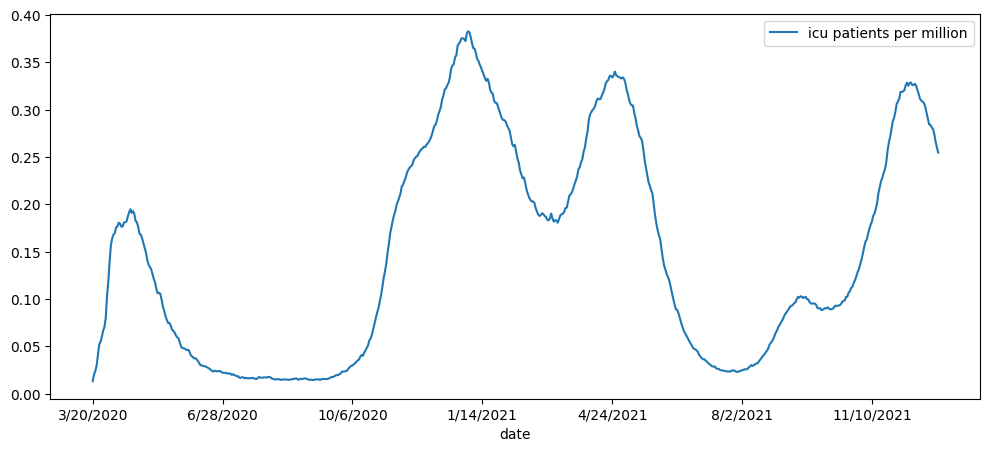

In [10]:
df.icu_patients_per_million.plot(figsize=(12,5), label='icu patients per million')
plt.legend(loc="upper right")

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
print(df.shape)
train=df.iloc[:-90,:]
test=df.iloc[-90:,:]
print(train.shape,test.shape)
#stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,0:4], m=14  ,trace=True, seasonal=True, suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
#print(test.iloc[0],test.iloc[-1])

(652, 6)
(562, 6) (90, 6)


90
0.17274922433940518


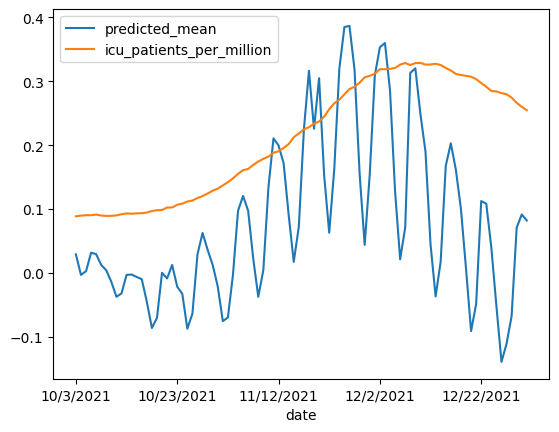

In [13]:
modela=SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(2,0,2),seasonal_order=(0,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

In [14]:
predicted_list, error_list = [], []
training_data = train
modela = SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(2,0,2),seasonal_order=(0,0,1,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
print(r2_score(pred,test['icu_patients_per_million']))
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.030
-0.786971794229067


In [15]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
28/28 [==============================] - 3s 8ms/step - loss: 6.0497e-04
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 6.0186e-04
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 5.9939e-04
Epoch 4/100
28/28 [==============================] - 0s 6ms/step - loss: 5.9795e-04
Epoch 5/100
28/28 [==============================] - 0s 8ms/step - loss: 5.9566e-04
Epoch 6/100
28/28 [==============================] - 0s 9ms/step - loss: 5.9268e-04
Epoch 7/100
28/28 [==============================] - 0s 4ms/step - loss: 5.9378e-04
Epoch 8/100
28/28 [==============================] - 0s 8ms/step - loss: 5.8982e-04
Epoch 9/100
28/28 [==============================] - 0s 6ms/step - loss: 5.8822e-04
Epoch 10/100
28/28 [==============================] - 0s 6ms/step - loss: 5.8594e-04
Epoch 11/100
28/28 [==============================] - 0s 7ms/step - loss: 5.8541e-04
Epoch 12/100
28/28 [==============================] - 0s 7ms/step - loss: 

3/3 [==============================] - 0s 4ms/step


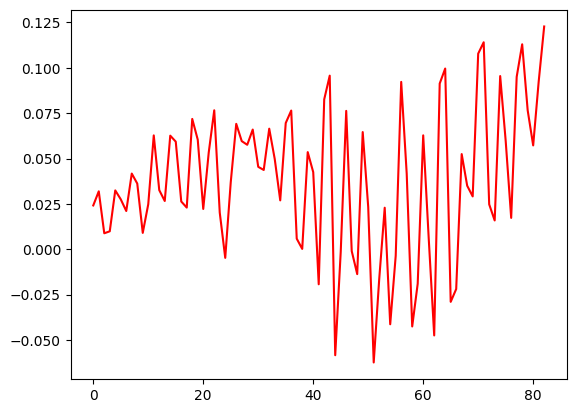

Test MSE: 0.022
-0.5702199430498067


In [16]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)
print(r2_score(test_data[7:],predictions))

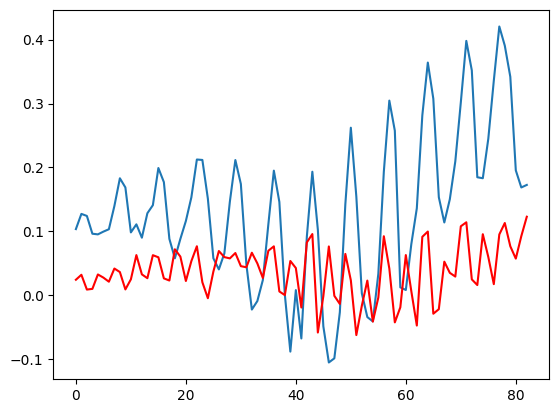

Test MSE: 0.022
-0.5702199430498067


In [17]:
pred
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)
print(r2_score(test_data[7:],predictions))

Test MSE: 0.015
-0.7283953393895082


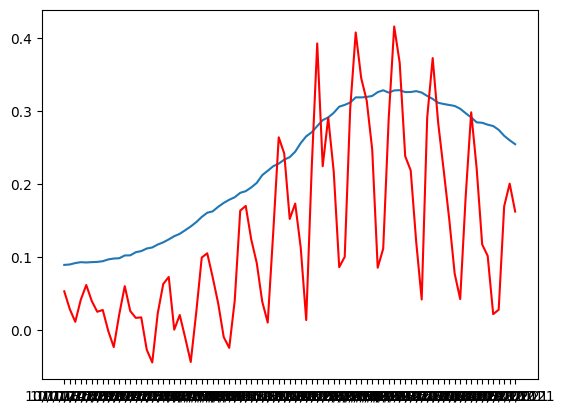

In [18]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
print(r2_score(test.iloc[:83,-1],pred_final))
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

In [19]:
p1=list(pred_final)
tmp=data1.iloc[-83:,:]
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p1[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p1=jnk.iloc[:,-1]
p1

0      9.601095
1      5.214481
2      2.073096
3      7.506966
4     11.158128
        ...    
78     3.969644
79     5.042795
80    30.615798
81    36.205619
82    29.302826
Name: 13, Length: 83, dtype: float64

In [20]:
final={"falling":p1}
final=pd.DataFrame(p1)
final.to_csv('Output_2023_03_09.csv')